In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rc('figure',figsize=(8,7))

# Loading data

In [2]:
test_data = pd.read_csv('test.csv')

In [24]:
meal_info = pd.read_csv('./train/meal_info.csv')
fulfilment_center_info = pd.read_csv('./train/fulfilment_center_info.csv')
train_data = pd.read_csv('./train/train.csv')

In [4]:
meal_info.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
print('Total no of meals',len(meal_info['category'].unique()))

Total no of meals 14


In [25]:
fulfilment_center_info.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [26]:
print('Total no of centers:',len(fulfilment_center_info['center_id'].unique()))

Total no of centers: 77


In [27]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [28]:
train_data.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [29]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


# EDA
### Fulfilment center info

In [30]:
print('Types of centers:',fulfilment_center_info['center_type'].unique())

Types of centers: ['TYPE_A' 'TYPE_B' 'TYPE_C']


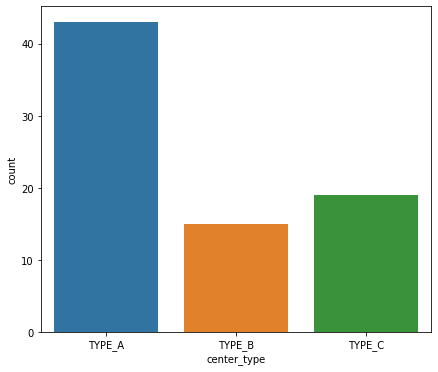

In [31]:
sns.countplot(fulfilment_center_info['center_type'])

In [19]:

print('No of stores:')
train_data['center_id'].nunique()

No of stores:


77

In [32]:
print('No of city:', fulfilment_center_info['city_code'].nunique())

No of city: 51


In [33]:
print("No of regions:" , fulfilment_center_info['region_code'].nunique())

No of regions: 8


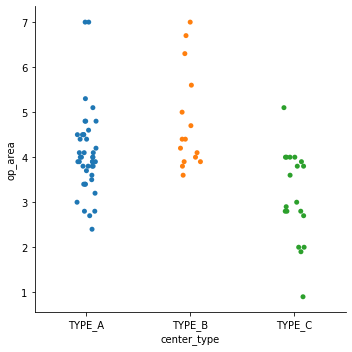

In [40]:
sns.catplot(x='center_type', y='op_area', data=fulfilment_center_info)
plt.show()

In [42]:
fulfilment_center_info.drop('region_code', axis=1, inplace=True)

### Meal Info 

In [43]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


Text(0, 0.5, 'No of meals')

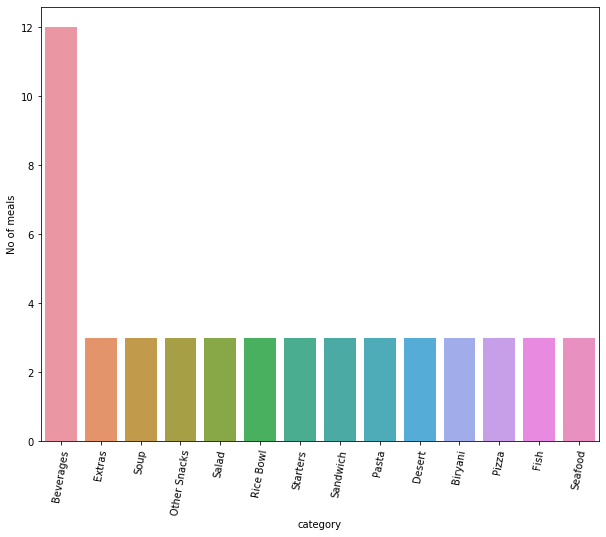

In [49]:
sns.countplot(meal_info['category'])
plt.xticks(rotation=80)
plt.ylabel('No of meals')

Text(0, 0.5, 'No of meals')

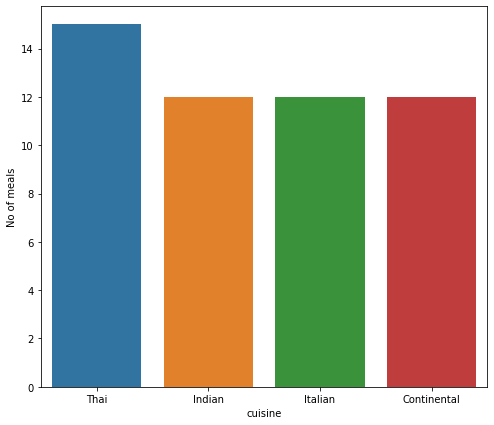

In [53]:
sns.countplot(meal_info['cuisine'])
plt.ylabel('No of meals')

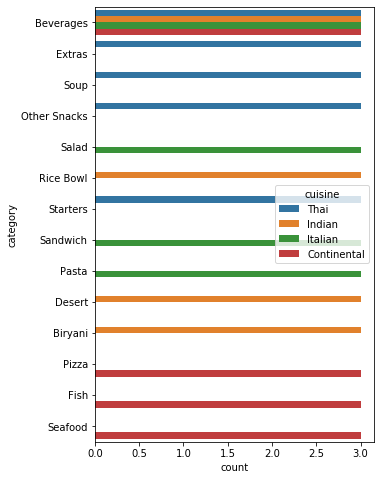

In [63]:
fig , ax = plt.subplots(figsize=(5,8))
sns.countplot(y='category', hue='cuisine', data=meal_info,ax = ax)
plt.show(
)

### Train 

In [65]:
# to merge we have to find a column on which basis of we can merge
train_data = pd.merge(train_data, fulfilment_center_info,on='center_id' )

In [67]:
train_data = pd.merge(train_data, meal_info, on='meal_id')

In [68]:
train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,TYPE_A,4.5,Fish,Continental


In [72]:
list(train_data.keys())

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'center_type',
 'op_area',
 'category',
 'cuisine']